In [ ]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

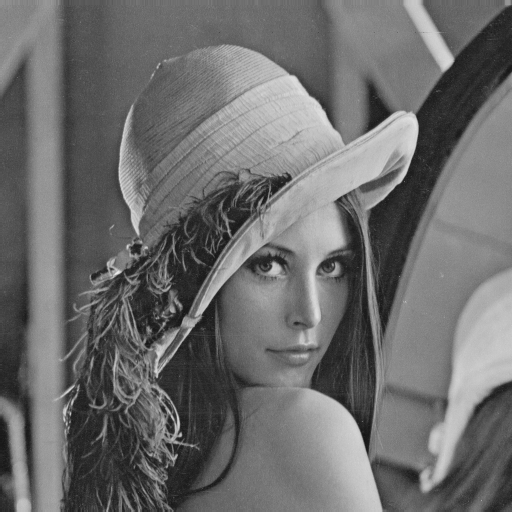

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/lenna.png')
f = 0.289*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]
cv2_imshow(f)

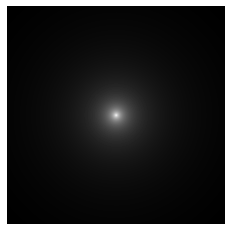

In [ ]:
F = np.fft.fft2(f)
img_fft = np.fft.fftshift(F)

# Butterwort Low Pass Filter
rows,cols = f.shape
H = np.zeros((rows,cols), dtype=np.float32)
D0 = 15 # cut of frequency
n = 1 # order 

for u in range(rows):
    for v in range(cols):
        D = np.sqrt((u-rows/2)**2 + (v-cols/2)**2)
        H[u,v] = 1 / (1 + (D/D0)**n)
        
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
np.log1p(img_fft[15,125])

(7.5683133993082+2.459550952415995j)

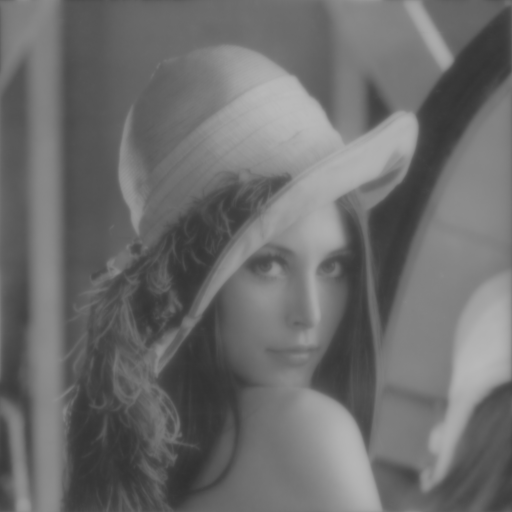

In [ ]:
# frequency domain image filters
Gshift = img_fft * H
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

cv2_imshow(g)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


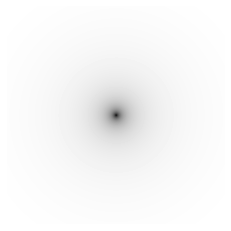

In [ ]:
# Butterworth High Pass Filter
for u in range(rows):
    for v in range(cols):
        D = np.sqrt((u-rows/2)**2 + (v-cols/2)**2)
        H[u,v] = 1 / (1 + (D0/D)**n)
        
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

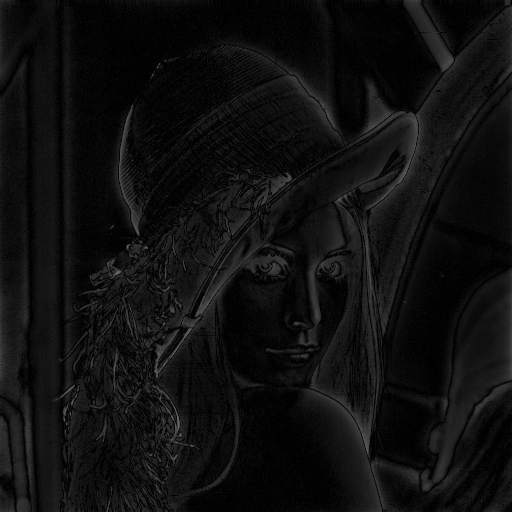

In [ ]:
# frequency domain image filters
Gshift = img_fft * H
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

cv2_imshow(g)